<a href="https://colab.research.google.com/github/Manan1811/Image-Denoising-Autoencoder/blob/master/Image_Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Model
from keras.datasets import mnist
from keras.layers import Convolution2D, MaxPooling2D, Dense, Input, Reshape, Flatten, Lambda,Conv2D, Conv2DTranspose 

In [2]:

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
output_X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.astype('float32') / 255.
output_X_test = X_test.reshape(-1,28,28,1)

print(X_train.shape, X_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [3]:
# adding some noise to data

input_x_train = output_X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=output_X_train.shape) 
input_x_test = output_X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=output_X_test.shape)

In [4]:
# creating denoising autoencoder model
inputs = Input(shape = (28,28,1))

conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)

upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(pool2)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

In [5]:
autoencoder = Model(inputs, outputs)
m = 256
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)       

In [6]:
autoencoder.fit(input_x_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Epoch 1/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2747
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1575
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1465
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1419
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1392
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1434
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1462
Epoch 8/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1595
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1420
Epoch 10/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1387


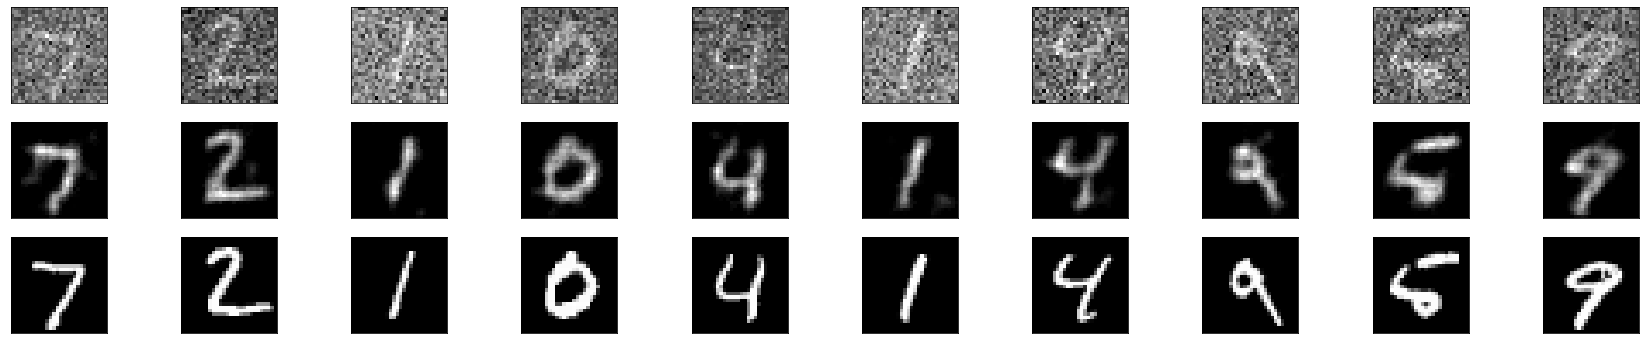

In [8]:
decoded_imgs = autoencoder.predict(input_x_test)

n = 10
plt.figure(figsize=(30,6))
for i in range(n):
  # noisy images
  ax = plt.subplot(3,n,i+1)
  plt.imshow(input_x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # denoised images
  ax = plt.subplot(3,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # original images
  ax = plt.subplot(3,n,i+1+n*2)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
